# Credit Card Fraud (WORK IN PROGRESS)

In this notebook, we will be looking at a dataset relating to credit card fraud.  
  
Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
todo = set()

Read in our data.

In [3]:
df = pd.read_csv('creditcard.csv')

Let's take a quick look to see what we're working with.

In [4]:
print(df.shape)
print(df.head(10))

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.

284807 rows, 31 columns

Unfortunately, the Vx column headings are all obfuscated results from a PCA transformation. The other features are defined as follows:
  
Time - The number of seconds after the first transaction  
Amount - Dollars  
Class - 0 = No Fraud / 1 = Fraud

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,...,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,...,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,...,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,...,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,...,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,...,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,...,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


That's a little bit easier to read.  
  
Since the Vx values are all results from a PCA transformation, I'm not sure if we have to worry about outlier values or not. Moving over to the things we CAN identify, the minimum Amount is 0.0 which is odd given that these are supposed to be purchases. That might be worth checking out. The max Amount is also way outside of 3 standard deviations. That field is going to need some attention. Our Class is also a binary 0/1 so a mean of 0.00173 indicates we have a pretty big disparity in the Class variable.

In [7]:
todo.add('Amount - 0.00')
todo.add('Amount - MAX')
todo.add('Review Class Breakdown')

Let's take a quick look at the independent variables to see if they offer any guidance.

<AxesSubplot:>

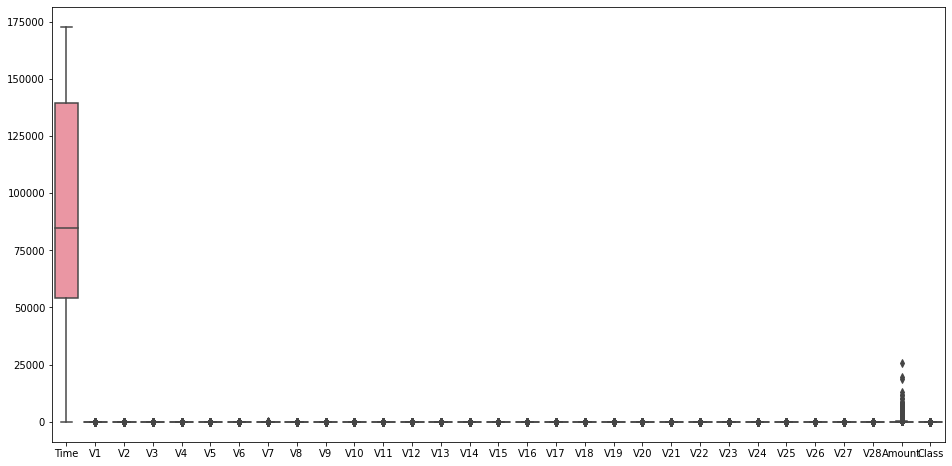

In [8]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df)

Not...particularly helpful. Maybe we just look at the V columns for now.

<AxesSubplot:>

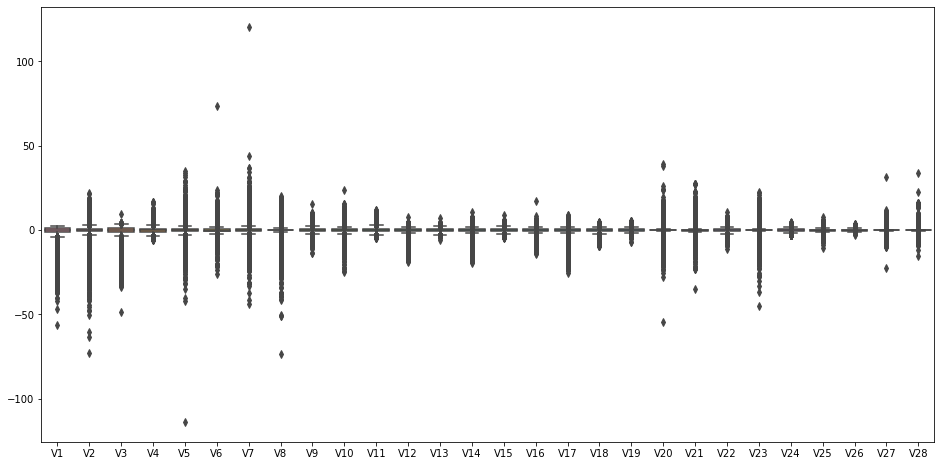

In [9]:
df_V = df.drop(columns=['Time', 'Amount', 'Class'])

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_V)

Well...it's different. Lots of outliers, both high and low, and lots of super compressed IQR fences. This data might be easier to look at on an individual basis, but let's review the other 3 columns before we head down that road.

<AxesSubplot:xlabel='Time', ylabel='Count'>

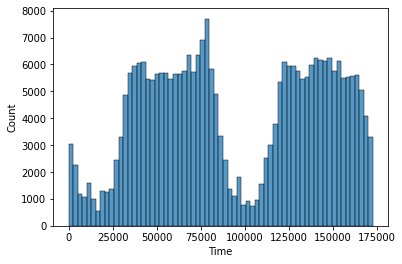

In [10]:
sns.histplot(data=df['Time'])

As this is a representation of time after an arbitrary starting point we need to dig deeper. If we look at the 100,000 mark which is conveyed in seconds, we can calculate that it's roughly 27 hours after our 0 mark. Twenty four hours would be represented by 86,400 seconds which appears to be just about what we have dip to dip. This data is daily cyclical in nature. The big question to come from this is if fraud is more likely to occur at a certain time of day or not.

<AxesSubplot:xlabel='Amount', ylabel='Count'>

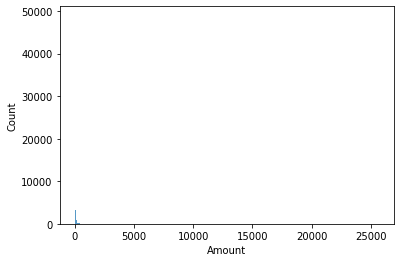

In [25]:
sns.histplot(data=df['Amount'])

This is where those really high Amounts are going to cause problems. This isn't a particularly helpful visualization.

<AxesSubplot:xlabel='Amount', ylabel='Count'>

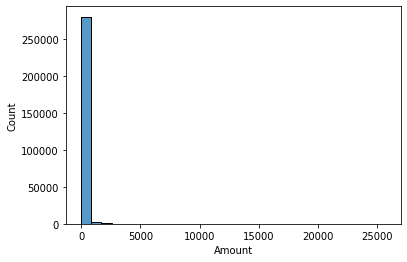

In [26]:
sns.histplot(data=df['Amount'], bins=30)

<AxesSubplot:xlabel='Amount', ylabel='Count'>

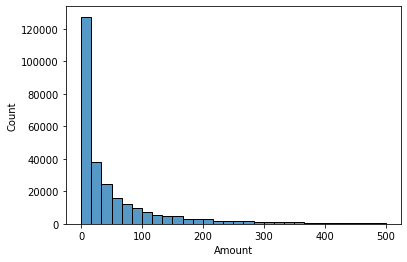

In [27]:
sns.histplot(data=df[df['Amount'] < 500]['Amount'], bins=30)

As we dig depeer into Amount, we can see that most of the data is for extremely small dollar amounts (<$20) and tails off pretty quickly as the dollar amounts rise. It would also be worth looking at the amount/fraud interaction.

Now let's take a look at our dependent variable!

In [31]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Needle, meet haystack.

Let's circle back to the question of what the fraud amounts look like. Maybe that will offer something.

<AxesSubplot:xlabel='Amount', ylabel='Count'>

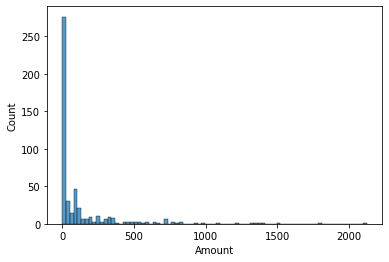

In [32]:
sns.histplot(df[df['Class'] == 1]['Amount'])

Most of our fraud is also for extremely small dollar amounts.

## Pairwise Analysis

<AxesSubplot:>

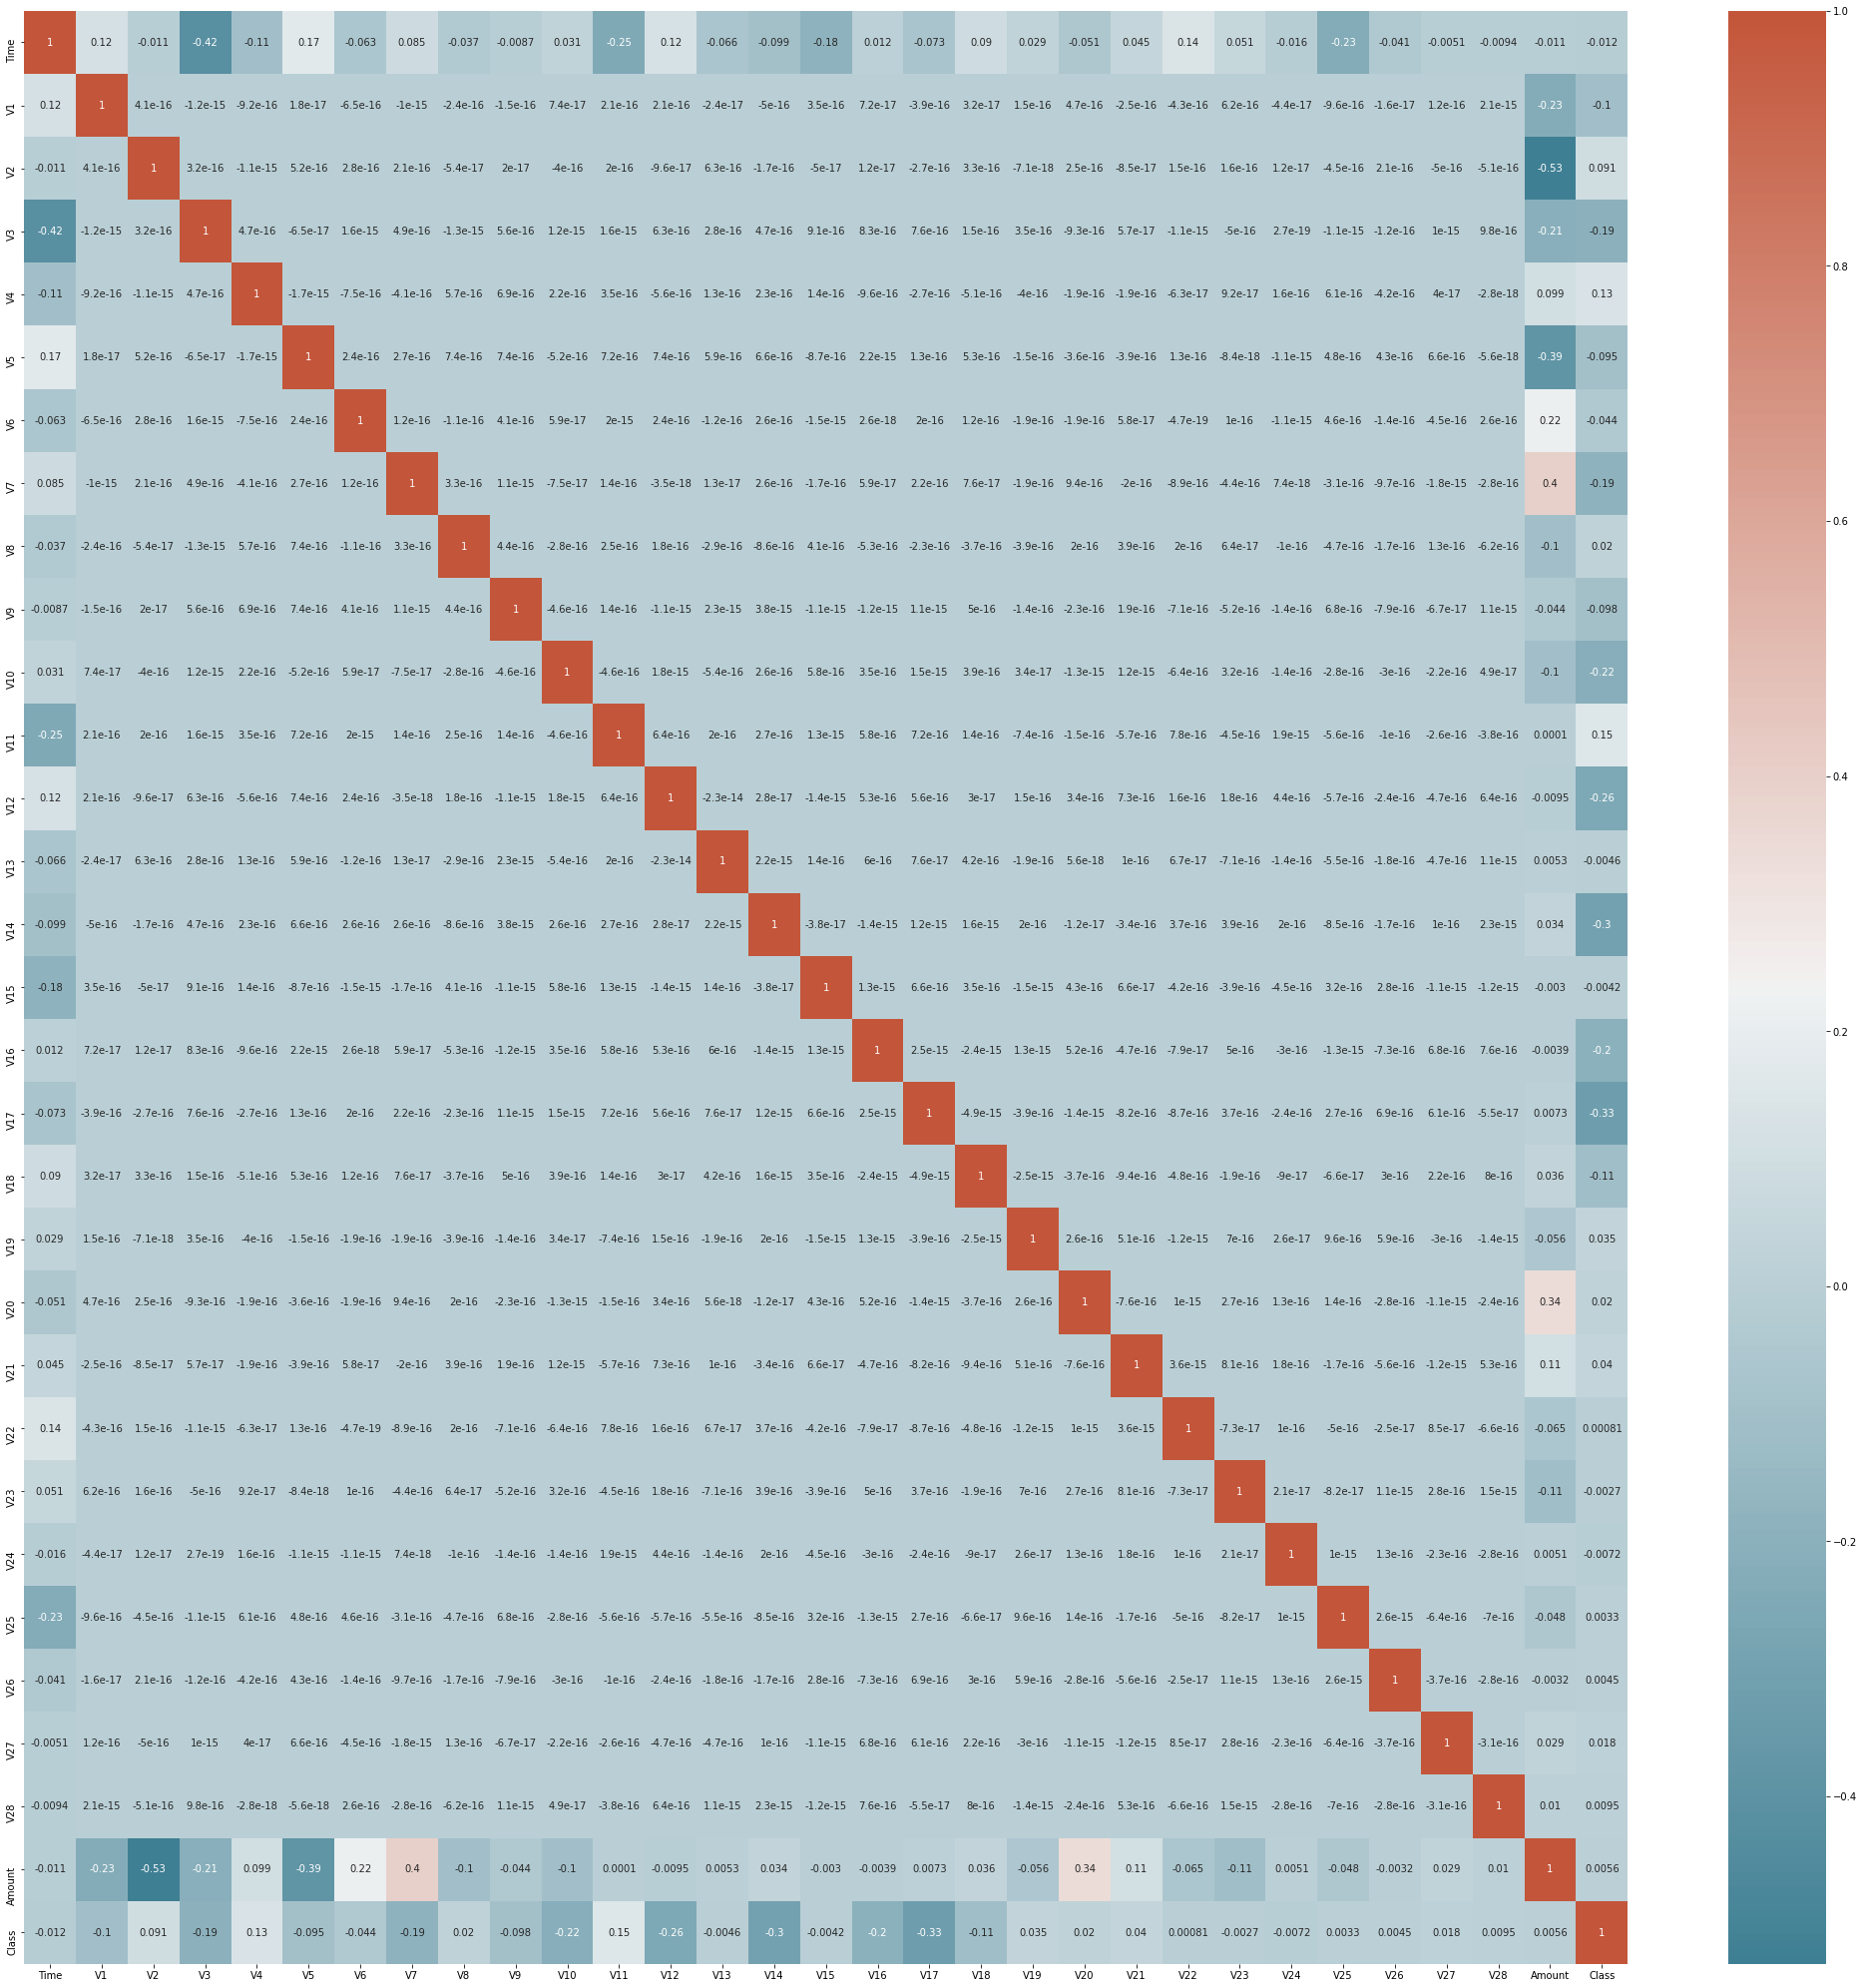

In [33]:
# calculate correlation matrix
corr = df.corr() # plot the heatmap

fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Not a whole lot to gain from this. The Vx variables don't appear to have strong correlation with each other. A couple of them show stronger correlation with Amount and we do see some negative correlation with Class.

## Data Cleanup

We haven't really identified a lot to clean up, save for the 0.00 Amounts and outliers. Let's see how many there are.

In [34]:
df[df['Amount'] == 0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


That's honestly a lot more than I expected. Maybe zero dollar amounts are a test to see if a credit card number works?

In [35]:
df[df['Amount'] == 0]['Class'].value_counts()

0    1798
1      27
Name: Class, dtype: int64

In [36]:
27/492

0.054878048780487805

In [37]:
1798/284315

0.006323971651161564

Given that 5% of our fraud happens on 0.006% of our data, this actually seems like a pretty GOOD indicator. Definitely leaving that in for the moment.

In [34]:
from sklearn.cross_validation import train_test_split



x_train, x_test, y_train, y_test = train_test_split(df, data_target, train_size=0.70, test_size=0.30, random_state=1)

NameError: name 'train_test_split' is not defined